# Lecture 2: Class demo

## Imports

In [1]:
# import the libraries
import os
import sys
sys.path.append(os.path.join(os.path.abspath(".."), (".."), "code"))
from plotting_functions import *
from utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

pd.set_option("display.max_colwidth", 200)

<br><br>

## Data and Exploratory Data Analysis (EDA)

Let's bring back King County housing sale prediction data from the course introduction video. You can download the data from [here](https://www.kaggle.com/harlfoxem/housesalesprediction). 

In [2]:
housing_df = pd.read_csv('../../data/kc_house_data.csv')
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#### Is this a classification problem or a regression problem? 
<br><br><br><br>

In [3]:
# How many data points do we have? 
housing_df.shape

(21613, 21)

In [4]:
# What are the columns in the dataset? 
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Let's explore the features. Let's try the `info()` method. 

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Let's try the `describe()` method

In [6]:
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Should we include all columns?
<br><br><br><br>

In [7]:
housing_df['id'] # Should we include the id column?

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21608     263000018
21609    6600060120
21610    1523300141
21611     291310100
21612    1523300157
Name: id, Length: 21613, dtype: int64

In [8]:
housing_df['date'] # What about the date column? 

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [9]:
housing_df['zipcode'] # What about the zipcode column? 

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21613, dtype: int64

In [10]:
# What are the value counts of the `waterfront` feature? 
housing_df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [11]:
# What are the value_counts of `yr_renovated` feature? 
housing_df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

Many opportunities to clean the data but we'll stop here. 

<br><br><br><br>

Let's create `X` and `y`. 

In [12]:
X = housing_df.drop(columns=['id', 'date', 'zipcode', 'price']) 
y = housing_df['price']

<br><br>

### Baseline model 

In [13]:
# Train a DummyRegressor model 

from sklearn.dummy import DummyRegressor # Import DummyRegressor 

# Create a class object for the sklearn model.
dummy = DummyRegressor()

# fit the dummy regressor
dummy.fit(X, y)

# score the model 
dummy.score(X, y)

0.0

In [14]:
# predict on X using the model
dummy.predict(X)

array([540088.14176653, 540088.14176653, 540088.14176653, ...,
       540088.14176653, 540088.14176653, 540088.14176653])

<br><br>

### Decision tree model 

In [15]:
# Train a decision tree model 

from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor 

# Create a class object for the sklearn model.
dt = DecisionTreeRegressor(random_state=123)

# fit the decision tree regressor 
dt.fit(X, y)

# score the model 
dt.score(X, y)

0.9991338290544213

We are getting a perfect accuracy. Should we be happy with this model and deploy it? Why or why not?

What's the depth of this model? 

In [16]:
dt.get_depth()

38

<br><br><br><br>

## Data splitting 

Let's split the data and  
- Train on the train split 
- Score on the test split

In [17]:
# Split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [18]:
# Instantiate a class object 
dt = DecisionTreeRegressor(random_state=123)

# Train a decision tree on X_train, y_train
dt.fit(X_train, y_train)

# Score on the train set
dt.score(X_train, y_train)

0.9994394006711425

In [19]:
# Score on the test set
dt.score(X_test, y_test)

0.719915905190645

### Activity: Discuss the following questions in your group

- Why is there a large gap between train and test scores? 
- What would be the effect of increasing or decreasing `test_size`?
- Why are we setting the `random_state`? Is it a good idea to try a bunch of values for the `random_state` and pick the one which gives the best scores? 
- Would it be possible to further improve the scores?

<br><br><br><br>

Let's try out different depths. 

In [20]:
# max_depth= 1 
dt = DecisionTreeRegressor(max_depth=1, random_state=123) 
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=123)

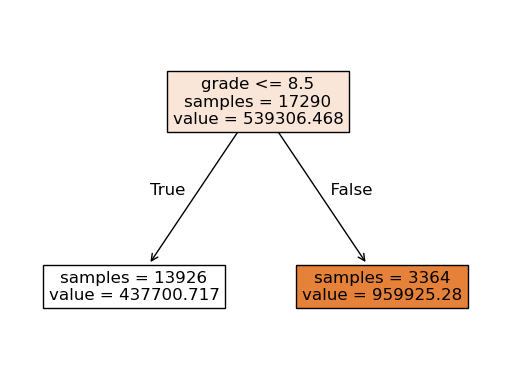

In [21]:
# Visualize your decision stump
from sklearn.tree import plot_tree 
plot_tree(dt, feature_names = X.columns.tolist(), impurity=False, filled=True, fontsize=12);

In [22]:
dt.score(X_train, y_train) # Score on the train set

0.3209427041566191

In [23]:
dt.score(X_test, y_test) # Score on the test set

0.31767136668453344

- How do these scores compare to the previous scores? 

Let's try depth 10. 

In [24]:
dt = DecisionTreeRegressor(max_depth=10, random_state=123) # max_depth= 10 
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=123)

In [25]:
dt.score(X_train, y_train) # Score on the train set

0.9108334653214172

In [26]:
dt.score(X_test, y_test) # Score on the test set

0.7728396574320712

Any improvements? Which depth should we pick? 

### Single validation set

We are using the test data again and again. How about creating a validation set to pick the right depth and assessing the final model on the test set?   

In [27]:
# Create a validation set 
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [28]:
tr_scores = []
valid_scores = []
depths = np.arange(1, 35, 2)

for depth in depths:  
    # Create and fit a decision tree model for the given depth  
    dt = DecisionTreeRegressor(max_depth=depth, random_state=123)
    
    # Calculate and append r2 scores on the training and validation sets
    dt.fit(X_tr, y_tr)
    tr_scores.append(dt.score(X_tr, y_tr))
    valid_scores.append(dt.score(X_valid, y_valid))
    
results_single_valid_df = pd.DataFrame({"train_score": tr_scores, 
                           "valid_score": valid_scores},index = depths)
results_single_valid_df

,train_score,valid_score
1,0.319559,0.326616
3,0.603739,0.555180
5,0.754938,0.677567
7,0.833913,0.737285
9,0.890456,0.763480
11,0.931896,0.790521
13,0.963024,0.769030
15,0.981643,0.752728
17,0.991810,0.735637
19,0.996424,0.745925


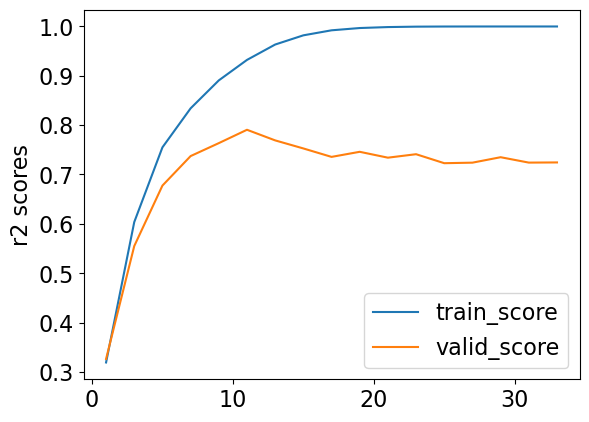

In [29]:
results_single_valid_df[['train_score', 'valid_score']].plot(ylabel='r2 scores');

What depth gives the "best" validation score? 

In [30]:
best_depth = results_single_valid_df['valid_score'].idxmax() 
best_depth

11

Let's assess the best model on the test set. 

In [31]:
test_model = DecisionTreeRegressor(max_depth=best_depth, random_state=123)
test_model.fit(X_train, y_train)
test_model.score(X_test, y_test)

0.7784948928666875

- How do the test scores compare to the validation scores? 
- Can we have a more robust estimate of the test score? 

### Cross-validation

In [32]:
depths = np.arange(1, 35, 2)

cv_train_scores = []
cv_valid_scores = []
for depth in depths: 
    # Create and fit a decision tree model for the given depth   
    dt = DecisionTreeRegressor(max_depth = depth, random_state=123)

    # Carry out cross-validation
    scores = cross_validate(dt, X_train, y_train, return_train_score=True)
    cv_train_scores.append(scores['train_score'].mean())
    cv_valid_scores.append(scores['test_score'].mean())

In [33]:
results_df = pd.DataFrame({"train_score": cv_train_scores, 
                           "valid_score": cv_valid_scores
                           },
                           index=depths
                            )
results_df

,train_score,valid_score
1,0.321050,0.322465
3,0.603243,0.559284
5,0.752169,0.688484
7,0.835876,0.758259
9,0.894960,0.768184
11,0.938201,0.772185
13,0.966812,0.760966
15,0.983340,0.754620
17,0.992220,0.730025
19,0.996487,0.722803


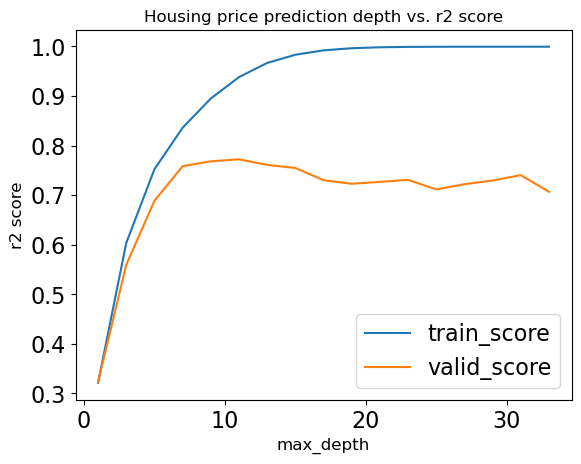

In [34]:
results_df[['train_score', 'valid_score']].plot();
plt.title('Housing price prediction depth vs. r2 score', fontsize=12)  # Adjust title font size
plt.xlabel('max_depth', fontsize=12)  # Adjust x-axis label font size
plt.ylabel('r2 score', fontsize=12);  # Adjust y-axis label font size

What's the "best" depth with cross-validation? 

In [35]:
best_depth = results_df['valid_score'].idxmax()
best_depth

11

### Discuss the following questions in your group

1. For which depth(s) we are underfitting? How about overfitting?
2. Above we are picking the depth which gives us the best cross-validation score. Is it always a good idea to pick such a depth? What if you have a much simpler model (smaller `max_depth`), which gives us almost the same CV scores?
3. If we care about the test scores in the end, why don't we use it in training? 
4. Do you trust our hyperparameter optimization? In other words, do you believe that we have found the best possible depth? 

### Assessing on the test set

In [36]:
dt_final = DecisionTreeRegressor(max_depth=best_depth, random_state=123)
dt_final.fit(X_train, y_train)
dt_final.score(X_train, y_train)

0.9308647034083802

In [37]:
dt_final.score(X_test, y_test)

0.7784948928666875

How do these scores compare to the scores when we used a single validation set? 

### Learned model 

In [38]:
#What's the depth of the model? 
dt_final.get_depth()

11

In [39]:
# plot_tree(dt_final, feature_names = X_train.columns.tolist(), impurity=False, filled=True);

In [40]:
# Which features are the most important ones?
dt_final.feature_importances_

array([0.00080741, 0.00327551, 0.25123925, 0.01808825, 0.00079645,
       0.03213916, 0.01190633, 0.00106308, 0.36400802, 0.02313684,
       0.00295235, 0.01209545, 0.00064647, 0.17216105, 0.06835056,
       0.02416048, 0.01317334])

Let's examine feature importances. 

In [41]:
df = pd.DataFrame( 
    data = {
        "features": dt_final.feature_names_in_,
        "feature_importances": dt_final.feature_importances_
    }
)
df.sort_values("feature_importances", ascending=False)

,features,feature_importances
8,grade,0.364008
2,sqft_living,0.251239
13,lat,0.172161
14,long,0.068351
5,waterfront,0.032139
15,sqft_living15,0.024160
9,sqft_above,0.023137
3,sqft_lot,0.018088
16,sqft_lot15,0.013173
11,yr_built,0.012095


<br><br><br><br>

## Summary

### Concepts we revised in this demo
- Exploratory data analysis
- Baselines
- Data splitting: train, test, validation sets
- Cross validation
- Underfitting, overfitting, the fundamental tradeoff
- The golden rule of supervised ML

### Typical steps to build a supervised machine learning model
- Ensure the data is appropriate for your task (e.g., labeled data, suitable features).
- Split the data into training and testing sets.
- Perform exploratory data analysis (EDA) on the training data to understand distributions, identify patterns, and detect potential issues.
- Preprocess and encode features (e.g., handle missing values, scale features, encode categorical variables)
    - coming up
- Build a baseline model to establish a performance benchmark.
- Train multiple candidate models on the training data
    - coming up
- Select promising models and perform hyperparameter tuning using cross-validation.
    - coming up
- Evaluate the generalization performance of the best model on the test set.